In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re 
import datetime

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

In [156]:
rush = pd.read_csv('clean_rushing_df.csv')
passing = pd.read_csv('clean_passing_df.csv')
receive = pd.read_csv('clean_receiving_df.csv')

In [157]:
rush

,Unnamed: 0,player,yds,att,day,g#,week,date,age,team,home/away,opp,result,y/a,td,pos.,-9999,pts
0,0,Saquon Barkley,164,18,Sun,1,1,2022-09-11,25,NYG,away,TEN,W 21-20,9.1,1,RB,BarkSa00,22.4
1,1,Jonathan Taylor,161,31,Sun,1,1,2022-09-11,23,IND,away,HOU,T 20-20 (OT),5.2,1,RB,TaylJo02,22.1
2,2,D'Andre Swift,144,15,Sun,1,1,2022-09-11,23,DET,home,PHI,L 35-38,9.6,1,RB,SwifDA00,20.4
3,3,Nick Chubb,141,22,Sun,1,1,2022-09-11,26,CLE,away,CAR,W 26-24,6.4,0,RB,ChubNi00,14.1
4,4,Leonard Fournette,127,21,Sun,1,1,2022-09-11,27,TAM,away,DAL,W 19-3,6.0,0,RB,FourLe00,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10176,126,Theo Riddick,-2,3,Sun,15,16,2018-12-23,27,DET,home,MIN,L 9-27,-0.7,0,RB,RiddTh00,-0.2
10177,127,Derek Carr,-3,4,Mon,15,16,2018-12-24,27,OAK,home,DEN,W 27-14,-0.8,0,QB,CarrDe02,-0.3
10178,128,Sterling Shepard,-3,1,Sun,15,16,2018-12-23,25,NYG,away,IND,L 27-28,-3.0,0,WR,ShepSt00,-0.3
10179,129,Tim Patrick,-7,1,Mon,15,16,2018-12-24,25,DEN,away,OAK,L 14-27,-7.0,0,WR,PatrTi00,-0.7


In [162]:
receive.drop(columns=['Unnamed: 0'], inplace=True)

In [165]:
receive

,player,yds,tgt,day,g#,week,date,age,team,home/away,opp,result,rec,y/r,td,ctch%,y/tgt,pos.,pts
0,Justin Jefferson,184,11,Sun,1,1,2022-09-11,23,MIN,home,GNB,W 23-7,9,20.4,2,81.8,16.7,WR,39.4
1,A.J. Brown,155,13,Sun,1,1,2022-09-11,25,PHI,away,DET,W 38-35,10,15.5,0,76.9,11.9,WR,25.5
2,Davante Adams,141,17,Sun,1,1,2022-09-11,29,LVR,away,LAC,L 19-24,10,14.1,1,58.8,8.3,WR,30.1
3,Ja'Marr Chase,129,16,Sun,1,1,2022-09-11,22,CIN,home,PIT,L 20-23 (OT),10,12.9,1,62.5,8.1,WR,28.9
4,Cooper Kupp,128,15,Thu,1,1,2022-09-08,29,LAR,home,BUF,L 10-31,13,9.8,1,86.7,8.5,WR,31.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19910,Jordan Thomas,0,1,Sun,15,16,2018-12-23,22,HOU,away,PHI,L 30-32,0,NaN,0,0.0,0.0,TE,0.0
19911,Logan Thomas,0,1,Sun,15,16,2018-12-23,27,BUF,away,NWE,L 12-24,0,NaN,0,0.0,0.0,TE,0.0
19912,James Washington,0,2,Sun,15,16,2018-12-23,22,PIT,away,NOR,L 28-31,0,NaN,0,0.0,0.0,WR,0.0
19913,C.J. Anderson,-5,3,Sun,15,16,2018-12-23,27,LAR,away,ARI,W 31-9,1,-5.0,0,33.3,-1.7,RB,0.5


In [115]:
passing['pts'] = passing['pts'].fillna(0)

In [116]:
receive['pts'] = receive['pts'].fillna(0)

In [47]:
rush['date'] = pd.to_datetime(rush['date'])

In [62]:
rush_2022 = rush[rush['date'].dt.year == 2022]

In [72]:
avg_pts_2022 = rush_2022.groupby('player')['pts'].mean()

In [67]:
rush_2022.merge(avg_pts_2022, on='player',how='left')

,player,yds,att,day,g#,week,date,age,team,home/away,opp,result,y/a,td,pos.,pts_x,pts_y
0,Saquon Barkley,164.0,18.0,Sun,1.0,1.0,2022-09-11,25.0,NYG,away,TEN,W 21-20,9.1,1.0,RB,22.4,12.225000
1,Jonathan Taylor,161.0,31.0,Sun,1.0,1.0,2022-09-11,23.0,IND,away,HOU,T 20-20 (OT),5.2,1.0,RB,22.1,11.536364
2,D'Andre Swift,144.0,15.0,Sun,1.0,1.0,2022-09-11,23.0,DET,home,PHI,L 35-38,9.6,1.0,RB,20.4,5.469231
3,Nick Chubb,141.0,22.0,Sun,1.0,1.0,2022-09-11,26.0,CLE,away,CAR,W 26-24,6.4,0.0,RB,14.1,13.262500
4,Leonard Fournette,127.0,21.0,Sun,1.0,1.0,2022-09-11,27.0,TAM,away,DAL,W 19-3,6.0,0.0,RB,12.7,5.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,Ben Roethlisberger,-1.0,1.0,Mon,16.0,17.0,2022-01-03,39.0,PIT,home,CLE,W 26-14,-1.0,0.0,QB,-0.1,-0.100000
2150,Matthew Stafford,-1.0,1.0,Sun,16.0,17.0,2022-01-02,33.0,LAR,away,BAL,W 20-19,-1.0,0.0,QB,-0.1,0.850000
2151,Tony Jones,-2.0,1.0,Sun,16.0,17.0,2022-01-02,24.0,NOR,home,CAR,W 18-10,-2.0,0.0,RB,-0.2,0.550000
2152,Jalen Reagor,-3.0,1.0,Sun,16.0,17.0,2022-01-02,23.0,PHI,away,WAS,W 20-16,-3.0,0.0,WR,-0.3,0.425000


In [75]:
def find_avg(df, year):
    
    df['date'] = pd.to_datetime(df['date'])
    
    df_year = df[df['date'].dt.year == year]
    
    avg_pts_year = df_year.groupby('player')['pts'].mean()
    
    df_year = df_year.merge(avg_pts_year, on='player',how='left')
    
    return df_year

In [77]:
rush_clean = find_avg(rush, 2022)

In [83]:
rush_clean = rush_clean.append(find_avg(rush, 2018))

In [87]:
rush_clean.rename(columns={'pts_x':'pts','pts_y':'avg_pts'}, inplace=True)

In [88]:
rush_clean

,player,yds,att,day,g#,week,date,age,team,home/away,opp,result,y/a,td,pos.,pts,avg_pts
0,Saquon Barkley,164.0,18.0,Sun,1.0,1.0,2022-09-11,25.0,NYG,away,TEN,W 21-20,9.1,1.0,RB,22.4,12.225000
1,Jonathan Taylor,161.0,31.0,Sun,1.0,1.0,2022-09-11,23.0,IND,away,HOU,T 20-20 (OT),5.2,1.0,RB,22.1,11.536364
2,D'Andre Swift,144.0,15.0,Sun,1.0,1.0,2022-09-11,23.0,DET,home,PHI,L 35-38,9.6,1.0,RB,20.4,5.469231
3,Nick Chubb,141.0,22.0,Sun,1.0,1.0,2022-09-11,26.0,CLE,away,CAR,W 26-24,6.4,0.0,RB,14.1,13.262500
4,Leonard Fournette,127.0,21.0,Sun,1.0,1.0,2022-09-11,27.0,TAM,away,DAL,W 19-3,6.0,0.0,RB,12.7,5.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,Theo Riddick,-2.0,3.0,Sun,15.0,16.0,2018-12-23,27.0,DET,home,MIN,L 9-27,-0.7,0.0,RB,0.0,0.000000
1838,Derek Carr,-3.0,4.0,Mon,15.0,16.0,2018-12-24,27.0,OAK,home,DEN,W 27-14,-0.8,0.0,QB,0.0,0.000000
1839,Sterling Shepard,-3.0,1.0,Sun,15.0,16.0,2018-12-23,25.0,NYG,away,IND,L 27-28,-3.0,0.0,WR,0.0,0.000000
1840,Tim Patrick,-7.0,1.0,Mon,15.0,16.0,2018-12-24,25.0,DEN,away,OAK,L 14-27,-7.0,0.0,WR,0.0,0.000000


In [98]:
rush_clean['pts_var'] = rush_clean['pts']-rush_clean['avg_pts']

In [110]:
def find_var(df):
    df_clean = find_avg(df, 2022)
    
    for year in range(2021,2017,-1):
        
        df_clean = df_clean.append(find_avg(df, year))
        
    df_clean.rename(columns={'pts_x':'pts','pts_y':'avg_pts'}, inplace=True)
    
    df_clean['pts_var'] = df_clean['pts'] - df_clean['avg_pts']
    
    return df_clean

In [108]:
rush_clean

,player,yds,att,day,g#,week,date,age,team,home/away,opp,result,y/a,td,pos.,pts,avg_pts,pts_var
0,Saquon Barkley,164.0,18.0,Sun,1.0,1.0,2022-09-11,25.0,NYG,away,TEN,W 21-20,9.1,1.0,RB,22.4,12.225000,10.175000
1,Jonathan Taylor,161.0,31.0,Sun,1.0,1.0,2022-09-11,23.0,IND,away,HOU,T 20-20 (OT),5.2,1.0,RB,22.1,11.536364,10.563636
2,D'Andre Swift,144.0,15.0,Sun,1.0,1.0,2022-09-11,23.0,DET,home,PHI,L 35-38,9.6,1.0,RB,20.4,5.469231,14.930769
3,Nick Chubb,141.0,22.0,Sun,1.0,1.0,2022-09-11,26.0,CLE,away,CAR,W 26-24,6.4,0.0,RB,14.1,13.262500,0.837500
4,Leonard Fournette,127.0,21.0,Sun,1.0,1.0,2022-09-11,27.0,TAM,away,DAL,W 19-3,6.0,0.0,RB,12.7,5.857143,6.842857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,Theo Riddick,-2.0,3.0,Sun,15.0,16.0,2018-12-23,27.0,DET,home,MIN,L 9-27,-0.7,0.0,RB,0.0,0.000000,0.000000
1838,Derek Carr,-3.0,4.0,Mon,15.0,16.0,2018-12-24,27.0,OAK,home,DEN,W 27-14,-0.8,0.0,QB,0.0,0.000000,0.000000
1839,Sterling Shepard,-3.0,1.0,Sun,15.0,16.0,2018-12-23,25.0,NYG,away,IND,L 27-28,-3.0,0.0,WR,0.0,0.000000,0.000000
1840,Tim Patrick,-7.0,1.0,Mon,15.0,16.0,2018-12-24,25.0,DEN,away,OAK,L 14-27,-7.0,0.0,WR,0.0,0.000000,0.000000


In [166]:
rush = find_var(rush)

In [167]:
passing = find_var(passing)

In [168]:
receive = find_var(receive)

In [169]:
rush

,player,yds,att,day,g#,week,date,age,team,home/away,opp,result,y/a,td,pos.,pts,avg_pts,pts_var
0,Saquon Barkley,164,18,Sun,1,1,2022-09-11,25,NYG,away,TEN,W 21-20,9.1,1,RB,22.4,12.225000,10.175000
1,Jonathan Taylor,161,31,Sun,1,1,2022-09-11,23,IND,away,HOU,T 20-20 (OT),5.2,1,RB,22.1,11.536364,10.563636
2,D'Andre Swift,144,15,Sun,1,1,2022-09-11,23,DET,home,PHI,L 35-38,9.6,1,RB,20.4,5.469231,14.930769
3,Nick Chubb,141,22,Sun,1,1,2022-09-11,26,CLE,away,CAR,W 26-24,6.4,0,RB,14.1,13.262500,0.837500
4,Leonard Fournette,127,21,Sun,1,1,2022-09-11,27,TAM,away,DAL,W 19-3,6.0,0,RB,12.7,5.857143,6.842857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,Theo Riddick,-2,3,Sun,15,16,2018-12-23,27,DET,home,MIN,L 9-27,-0.7,0,RB,-0.2,1.633333,-1.833333
1961,Derek Carr,-3,4,Mon,15,16,2018-12-24,27,OAK,home,DEN,W 27-14,-0.8,0,QB,-0.3,0.972727,-1.272727
1962,Sterling Shepard,-3,1,Sun,15,16,2018-12-23,25,NYG,away,IND,L 27-28,-3.0,0,WR,-0.3,1.200000,-1.500000
1963,Tim Patrick,-7,1,Mon,15,16,2018-12-24,25,DEN,away,OAK,L 14-27,-7.0,0,WR,-0.7,0.566667,-1.266667


In [170]:
passing

,player,att,day,g#,week,date,age,team,home/away,opp,result,att.1,cmp%,yds,td,int,td%,rate.1,sk,yds.1,y/a,ay/a,y/c,pos.,pts,avg_pts,pts_var
0,Patrick Mahomes,39,Sun,1,1,2022-09-11,26,KAN,away,ARI,W 44-21,39,76.9,360,5,0,12.8,144.2,0,0,9.2,11.79,12.0,QB,34.40,20.822500,13.577500
1,Justin Herbert,34,Sun,1,1,2022-09-11,24,LAC,home,LVR,W 24-19,34,76.5,279,3,0,8.8,129.4,0,0,8.2,9.97,10.7,QB,23.16,15.727500,7.432500
2,Geno Smith,28,Mon,1,1,2022-09-12,31,SEA,home,DEN,W 17-16,28,82.1,195,2,0,7.1,119.5,2,18,7.0,8.39,8.5,QB,15.80,16.362667,-0.562667
3,Kirk Cousins,32,Sun,1,1,2022-09-11,34,MIN,home,GNB,W 23-7,32,71.9,277,2,0,6.3,118.9,1,8,8.7,9.91,12.0,QB,19.08,16.712000,2.368000
4,Jordan Love,5,Sun,1,1,2022-09-11,23,GNB,away,MIN,L 7-23,5,80.0,65,0,0,0.0,118.7,0,0,13.0,13.00,16.3,QB,2.60,3.050000,-0.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,Derrick Henry,1,Sat,15,16,2018-12-22,24,TEN,home,WAS,W 25-16,1,0.0,0,0,0,0.0,39.6,0,0,0.0,0.00,NaN,RB,0.00,0.186667,-0.186667
577,Brian Hoyer,1,Sun,15,16,2018-12-23,33,NWE,home,BUF,W 24-12,1,0.0,0,0,0,0.0,39.6,0,0,0.0,0.00,NaN,QB,0.00,0.140000,-0.140000
578,Nate Sudfeld,1,Sun,15,16,2018-12-23,25,PHI,home,HOU,W 32-30,1,0.0,0,0,0,0.0,39.6,0,0,0.0,0.00,NaN,QB,0.00,0.000000,0.000000
579,Dede Westbrook,1,Sun,15,16,2018-12-23,25,JAX,away,MIA,W 17-7,1,0.0,0,0,0,0.0,39.6,0,0,0.0,0.00,NaN,WR,0.00,0.000000,0.000000


In [171]:
receive

,player,yds,tgt,day,g#,week,date,age,team,home/away,opp,result,rec,y/r,td,ctch%,y/tgt,pos.,pts,avg_pts,pts_var
0,Justin Jefferson,184,11,Sun,1,1,2022-09-11,23,MIN,home,GNB,W 23-7,9,20.4,2,81.8,16.7,WR,39.4,22.400000,17.000000
1,A.J. Brown,155,13,Sun,1,1,2022-09-11,25,PHI,away,DET,W 38-35,10,15.5,0,76.9,11.9,WR,25.5,17.281250,8.218750
2,Davante Adams,141,17,Sun,1,1,2022-09-11,29,LVR,away,LAC,L 19-24,10,14.1,1,58.8,8.3,WR,30.1,19.975000,10.125000
3,Ja'Marr Chase,129,16,Sun,1,1,2022-09-11,22,CIN,home,PIT,L 20-23 (OT),10,12.9,1,62.5,8.1,WR,28.9,23.216667,5.683333
4,Cooper Kupp,128,15,Thu,1,1,2022-09-08,29,LAR,home,BUF,L 10-31,13,9.8,1,86.7,8.5,WR,31.8,21.370000,10.430000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,Jordan Thomas,0,1,Sun,15,16,2018-12-23,22,HOU,away,PHI,L 30-32,0,NaN,0,0.0,0.0,TE,0.0,4.915385,-4.915385
3850,Logan Thomas,0,1,Sun,15,16,2018-12-23,27,BUF,away,NWE,L 12-24,0,NaN,0,0.0,0.0,TE,0.0,2.462500,-2.462500
3851,James Washington,0,2,Sun,15,16,2018-12-23,22,PIT,away,NOR,L 28-31,0,NaN,0,0.0,0.0,WR,0.0,3.118182,-3.118182
3852,C.J. Anderson,-5,3,Sun,15,16,2018-12-23,27,LAR,away,ARI,W 31-9,1,-5.0,0,33.3,-1.7,RB,0.5,3.300000,-2.800000


In [172]:
rush.to_csv('clean_rushing_df.csv')

In [173]:
passing.to_csv('clean_passing_df.csv')

In [174]:
receive.to_csv('clean_receiving_df.csv')

In [125]:
rush = pd.read_csv('clean_rushing_df.csv')

In [128]:
rush.sort_values(by='pts_var', ascending=False)

,Unnamed: 0,player,yds,att,day,g#,week,date,age,team,home/away,opp,result,y/a,td,pos.,pts,avg_pts,pts_var
6037,1888,Alvin Kamara,155.0,22.0,Fri,15.0,16.0,2020-12-25,25.0,NOR,home,MIN,W 52-33,7.0,6.0,RB,51.5,12.613333,38.886667
1010,1010,Joe Mixon,153.0,22.0,Sun,9.0,9.0,2022-11-06,26.0,CIN,home,CAR,W 42-21,7.0,4.0,RB,39.3,8.521429,30.778571
3394,1240,Jonathan Taylor,185.0,32.0,Sun,11.0,11.0,2021-11-21,22.0,IND,away,BUF,W 41-15,5.8,4.0,RB,42.5,17.640000,24.860000
526,526,Taysom Hill,112.0,9.0,Sun,5.0,5.0,2022-10-09,32.0,NOR,home,SEA,W 39-32,12.4,3.0,TE,29.2,6.066667,23.133333
1882,1882,Cam Akers,118.0,23.0,Sun,15.0,16.0,2022-12-25,23.0,LAR,home,DEN,W 51-14,5.1,3.0,RB,29.8,7.530769,22.269231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,21,Jonathan Taylor,56.0,17.0,Sun,1.0,1.0,2021-09-12,22.0,IND,home,SEA,L 16-28,3.3,0.0,RB,5.6,17.640000,-12.040000
3050,896,Derrick Henry,68.0,28.0,Sun,8.0,8.0,2021-10-31,27.0,TEN,away,IND,W 34-31 (OT),2.4,0.0,RB,6.8,19.212500,-12.412500
2682,528,Damien Harris,-4.0,4.0,Sun,4.0,4.0,2021-10-03,24.0,NWE,home,TAM,L 17-19,-1.0,0.0,RB,-0.4,12.130769,-12.530769
2308,154,Jonathan Taylor,51.0,15.0,Sun,2.0,2.0,2021-09-19,22.0,IND,home,LAR,L 24-27,3.4,0.0,RB,5.1,17.640000,-12.540000


In [129]:
passing.sort_values(by='pts_var', ascending=False)

,player,att,day,g#,week,date,age,team,home/away,opp,result,cmp%,yds,td,int,td%,sk,y/a,ay/a,y/c,pos.,pts,avg_pts,pts_var
38,Tua Tagovailoa,50.0,Sun,2.0,2.0,2022-09-18,24.0,MIA,away,BAL,W 42-38,72.0,469.0,6.0,2.0,12.0,1.0,9.4,9.98,13.0,QB,38.76,16.580000,22.180000
151,Lamar Jackson,43.0,Mon,5.0,5.0,2021-10-11,24.0,BAL,home,IND,W 31-25 (OT),86.0,442.0,4.0,0.0,9.3,2.0,10.3,12.14,11.9,QB,33.68,12.773333,20.906667
548,Joe Burrow,46.0,Sun,15.0,16.0,2021-12-26,25.0,CIN,home,BAL,W 41-21,80.4,525.0,4.0,0.0,8.7,3.0,11.4,13.15,14.2,QB,37.00,17.240000,19.760000
339,Patrick Mahomes,50.0,Sun,10.0,10.0,2021-11-14,26.0,KAN,away,LVR,W 41-14,70.0,406.0,5.0,0.0,10.0,0.0,8.1,10.12,11.6,QB,36.24,18.560000,17.680000
523,Jalen Hurts,44.0,Sun,14.0,15.0,2020-12-20,22.0,PHI,away,ARI,L 26-33,54.5,338.0,3.0,0.0,6.8,6.0,7.7,9.05,14.1,QB,25.52,8.222857,17.297143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Tom Brady,38.0,Sun,9.0,9.0,2020-11-08,43.0,TAM,home,NOR,L 3-38,57.9,209.0,0.0,3.0,0.0,3.0,5.5,1.95,9.5,QB,2.36,19.424000,-17.064000
619,Josh Allen,26.0,Sun,16.0,17.0,2022-01-02,25.0,BUF,home,ATL,W 29-15,42.3,120.0,0.0,3.0,0.0,0.0,4.6,-0.58,10.9,QB,-1.20,16.372500,-17.572500
38,Aaron Rodgers,28.0,Sun,1.0,1.0,2021-09-12,37.0,GNB,away,NOR,L 3-38,53.6,133.0,0.0,2.0,0.0,1.0,4.8,1.54,8.9,QB,1.32,19.397143,-18.077143
70,Kirk Cousins,26.0,Sun,2.0,2.0,2020-09-20,32.0,MIN,away,IND,L 11-28,42.3,113.0,0.0,3.0,0.0,3.0,4.3,-0.85,10.3,QB,-1.48,17.093333,-18.573333


In [130]:
receive.sort_values(by='pts_var', ascending=False)

,player,yds,tgt,day,g#,week,date,age,team,home/away,opp,result,rec,y/r,td,ctch%,y/tgt,pos.,pts,avg_pts,pts_var
2670,Tyreek Hill,269,15,Sun,11,12,2020-11-29,26,KAN,away,TAM,W 27-24,13,20.7,3,86.7,17.9,WR,57.9,20.306667,37.593333
1519,Tyler Lockett,200,20,Sun,6,7,2020-10-25,28,SEA,away,ARI,L 34-37 (OT),15,13.3,3,75.0,10.0,WR,53.0,15.493333,37.506667
3873,Ja'Marr Chase,266,12,Sun,16,17,2022-01-02,21,CIN,home,KAN,W 34-31,11,24.2,3,91.7,22.2,WR,55.6,23.216667,32.383333
769,Tyreek Hill,186,12,Sun,4,4,2021-10-03,27,KAN,away,PHI,W 42-30,11,16.9,3,91.7,15.5,WR,47.6,18.513333,29.086667
3136,Evan Engram,162,15,Sun,13,14,2022-12-11,28,JAX,away,TEN,W 36-22,11,14.7,2,73.3,10.8,TE,39.2,10.406250,28.793750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,Justin Jefferson,14,6,Sun,3,3,2022-09-25,23,MIN,home,DET,W 28-24,3,4.7,0,50.0,2.3,WR,4.4,22.400000,-18.000000
2412,Cooper Kupp,-1,5,Sun,9,10,2022-11-13,29,LAR,home,ARI,L 17-27,3,-0.3,0,60.0,-0.2,WR,2.9,21.370000,-18.470000
1926,Davante Adams,3,5,Sun,7,8,2022-10-30,29,LVR,away,NOR,L 0-24,1,3.0,0,20.0,0.6,WR,1.3,19.975000,-18.675000
1041,Calvin Ridley,0,5,Mon,4,4,2020-10-05,25,ATL,away,GNB,L 16-30,0,NaN,0,0.0,0.0,WR,0.0,19.157143,-19.157143


In [134]:
receive[receive['date'].dt.year==2022].groupby('player')

In [136]:
rush['date'] = pd.to_datetime(rush['date'])

In [179]:
rush_2022 = rush[rush['date'].dt.year==2022]

In [292]:
rush['w/l'] = [r[0] for r in rush['result']]

In [295]:
rush = rush[['player','yds','att','day','g#','week','date','age','team','home/away','opp','w/l','y/a','td','pos.',
     'pts','avg_pts','pts_var']]

In [302]:
rush

,player,yds,att,day,g#,week,date,age,team,home/away,opp,w/l,y/a,td,pos.,pts,avg_pts,pts_var
0,Saquon Barkley,164,18,Sun,1,1,2022-09-11,25,NYG,away,TEN,W,9.1,1,RB,22.4,12.225000,10.175000
1,Jonathan Taylor,161,31,Sun,1,1,2022-09-11,23,IND,away,HOU,T,5.2,1,RB,22.1,11.536364,10.563636
2,D'Andre Swift,144,15,Sun,1,1,2022-09-11,23,DET,home,PHI,L,9.6,1,RB,20.4,5.469231,14.930769
3,Nick Chubb,141,22,Sun,1,1,2022-09-11,26,CLE,away,CAR,W,6.4,0,RB,14.1,13.262500,0.837500
4,Leonard Fournette,127,21,Sun,1,1,2022-09-11,27,TAM,away,DAL,W,6.0,0,RB,12.7,5.857143,6.842857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,Theo Riddick,-2,3,Sun,15,16,2018-12-23,27,DET,home,MIN,L,-0.7,0,RB,-0.2,1.633333,-1.833333
1961,Derek Carr,-3,4,Mon,15,16,2018-12-24,27,OAK,home,DEN,W,-0.8,0,QB,-0.3,0.972727,-1.272727
1962,Sterling Shepard,-3,1,Sun,15,16,2018-12-23,25,NYG,away,IND,L,-3.0,0,WR,-0.3,1.200000,-1.500000
1963,Tim Patrick,-7,1,Mon,15,16,2018-12-24,25,DEN,away,OAK,L,-7.0,0,WR,-0.7,0.566667,-1.266667


In [303]:
passing

,player,att,day,g#,week,date,age,team,home/away,opp,w/l,cmp%,yds,td,int,sk,yds.1,y/a,ay/a,y/c,pos.,pts,avg_pts,pts_var
0,Patrick Mahomes,39,Sun,1,1,2022-09-11,26,KAN,away,ARI,W,76.9,360,5,0,0,0,9.2,11.79,12.0,QB,34.40,20.822500,13.577500
1,Justin Herbert,34,Sun,1,1,2022-09-11,24,LAC,home,LVR,W,76.5,279,3,0,0,0,8.2,9.97,10.7,QB,23.16,15.727500,7.432500
2,Geno Smith,28,Mon,1,1,2022-09-12,31,SEA,home,DEN,W,82.1,195,2,0,2,18,7.0,8.39,8.5,QB,15.80,16.362667,-0.562667
3,Kirk Cousins,32,Sun,1,1,2022-09-11,34,MIN,home,GNB,W,71.9,277,2,0,1,8,8.7,9.91,12.0,QB,19.08,16.712000,2.368000
4,Jordan Love,5,Sun,1,1,2022-09-11,23,GNB,away,MIN,L,80.0,65,0,0,0,0,13.0,13.00,16.3,QB,2.60,3.050000,-0.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,Derrick Henry,1,Sat,15,16,2018-12-22,24,TEN,home,WAS,W,0.0,0,0,0,0,0,0.0,0.00,NaN,RB,0.00,0.186667,-0.186667
577,Brian Hoyer,1,Sun,15,16,2018-12-23,33,NWE,home,BUF,W,0.0,0,0,0,0,0,0.0,0.00,NaN,QB,0.00,0.140000,-0.140000
578,Nate Sudfeld,1,Sun,15,16,2018-12-23,25,PHI,home,HOU,W,0.0,0,0,0,0,0,0.0,0.00,NaN,QB,0.00,0.000000,0.000000
579,Dede Westbrook,1,Sun,15,16,2018-12-23,25,JAX,away,MIA,W,0.0,0,0,0,0,0,0.0,0.00,NaN,WR,0.00,0.000000,0.000000


In [342]:
passing = passing.reset_index(drop=True)

In [363]:
passing_year = passing[passing['date'].dt.year==2022]

In [404]:
passing[(passing['pos.']=='QB') & (passing['home/away']=='away')]['pts_var'].mean()

-0.25931699077968284

In [460]:
avg_yds_team = passing[passing['date'].dt.year==2022].groupby('opp').mean().sort_values('yds',ascending=False).reset_index()
avg_yds_team

,opp,att,g#,week,age,cmp%,yds,td,int,sk,yds.1,y/a,ay/a,y/c,pts,avg_pts,pts_var
0,DET,31.823529,8.941176,9.411765,27.823529,65.411765,258.941176,1.647059,0.588235,1.764706,12.000000,7.976471,8.221765,12.211765,15.769412,12.900980,2.868431
1,LVR,32.705882,8.647059,9.117647,28.647059,69.623529,234.294118,1.352941,0.294118,1.529412,10.529412,6.970588,7.388824,10.170588,14.195294,12.542748,1.652546
2,BAL,31.055556,8.833333,9.222222,28.944444,66.627778,232.111111,1.111111,0.888889,2.444444,15.222222,7.438889,6.884444,11.076471,11.951111,11.644392,0.306719
3,JAX,31.222222,9.166667,9.722222,28.611111,64.827778,231.000000,1.500000,0.722222,1.611111,9.500000,7.727778,7.496667,11.938889,13.795556,12.158504,1.637051
4,ATL,30.176471,8.705882,9.058824,28.941176,66.117647,226.588235,1.352941,0.764706,1.117647,8.176471,9.235294,9.570588,13.152941,12.945882,11.580766,1.365116
5,MIN,28.809524,8.714286,9.238095,27.809524,64.952381,226.095238,1.095238,0.619048,1.714286,10.428571,7.585714,7.518571,11.585000,12.186667,10.809051,1.377616
6,MIA,32.000000,8.333333,8.833333,27.166667,68.611111,224.944444,1.500000,0.444444,2.111111,14.944444,8.361111,8.753889,12.111111,14.108889,12.440634,1.668255
7,CAR,31.647059,8.411765,8.764706,29.764706,67.688235,218.647059,1.294118,0.588235,1.941176,12.588235,6.982353,6.978235,10.470588,12.745882,11.680030,1.065853
8,ARI,30.842105,8.631579,9.157895,29.578947,74.068421,215.315789,1.526316,0.578947,1.684211,12.000000,8.636842,8.772105,11.247368,13.560000,11.762123,1.797877
9,TEN,29.478261,9.086957,9.695652,28.478261,57.886957,214.260870,1.217391,0.652174,1.826087,12.086957,6.286957,6.163043,11.060000,12.135652,11.046090,1.089562


<AxesSubplot:xlabel='opp', ylabel='yds'>

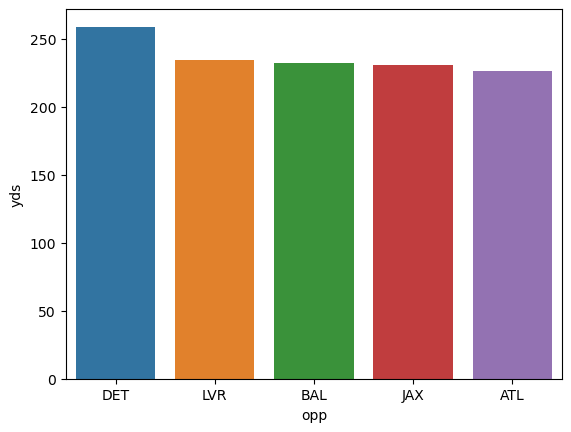

In [461]:
sns.barplot(x=avg_yds_team.head()['opp'], y=avg_yds_team['yds'])


<AxesSubplot:xlabel='opp', ylabel='yds'>

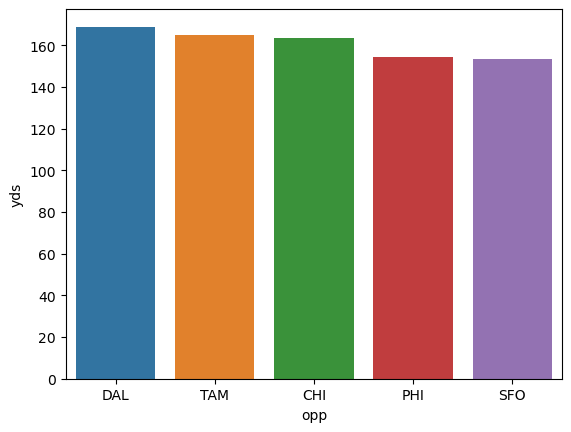

In [462]:
sns.barplot(x=avg_yds_team.tail()['opp'], y=avg_yds_team['yds'])

In [300]:
passing = passing[['player','att','day','g#','week','date','age','team','home/away','opp','w/l','cmp%','yds','td','int',
        'sk','yds.1','y/a','ay/a','y/c','pos.','pts','avg_pts','pts_var']]

In [301]:
passing

,player,att,day,g#,week,date,age,team,home/away,opp,w/l,cmp%,yds,td,int,sk,yds.1,y/a,ay/a,y/c,pos.,pts,avg_pts,pts_var
0,Patrick Mahomes,39,Sun,1,1,2022-09-11,26,KAN,away,ARI,W,76.9,360,5,0,0,0,9.2,11.79,12.0,QB,34.40,20.822500,13.577500
1,Justin Herbert,34,Sun,1,1,2022-09-11,24,LAC,home,LVR,W,76.5,279,3,0,0,0,8.2,9.97,10.7,QB,23.16,15.727500,7.432500
2,Geno Smith,28,Mon,1,1,2022-09-12,31,SEA,home,DEN,W,82.1,195,2,0,2,18,7.0,8.39,8.5,QB,15.80,16.362667,-0.562667
3,Kirk Cousins,32,Sun,1,1,2022-09-11,34,MIN,home,GNB,W,71.9,277,2,0,1,8,8.7,9.91,12.0,QB,19.08,16.712000,2.368000
4,Jordan Love,5,Sun,1,1,2022-09-11,23,GNB,away,MIN,L,80.0,65,0,0,0,0,13.0,13.00,16.3,QB,2.60,3.050000,-0.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,Derrick Henry,1,Sat,15,16,2018-12-22,24,TEN,home,WAS,W,0.0,0,0,0,0,0,0.0,0.00,NaN,RB,0.00,0.186667,-0.186667
577,Brian Hoyer,1,Sun,15,16,2018-12-23,33,NWE,home,BUF,W,0.0,0,0,0,0,0,0.0,0.00,NaN,QB,0.00,0.140000,-0.140000
578,Nate Sudfeld,1,Sun,15,16,2018-12-23,25,PHI,home,HOU,W,0.0,0,0,0,0,0,0.0,0.00,NaN,QB,0.00,0.000000,0.000000
579,Dede Westbrook,1,Sun,15,16,2018-12-23,25,JAX,away,MIA,W,0.0,0,0,0,0,0,0.0,0.00,NaN,WR,0.00,0.000000,0.000000


In [289]:
receive = receive[['player','yds','tgt','day','g#','week','date','age','team','home/away','opp','w/l','rec','y/r','td',
        'ctch%','y/tgt','pos.','pts','avg_pts','pts_var']]

In [290]:
receive

,player,yds,tgt,day,g#,week,date,age,team,home/away,opp,w/l,rec,y/r,td,ctch%,y/tgt,pos.,pts,avg_pts,pts_var
0,Justin Jefferson,184,11,Sun,1,1,2022-09-11,23,MIN,home,GNB,W,9,20.4,2,81.8,16.7,WR,39.4,22.400000,17.000000
1,A.J. Brown,155,13,Sun,1,1,2022-09-11,25,PHI,away,DET,W,10,15.5,0,76.9,11.9,WR,25.5,17.281250,8.218750
2,Davante Adams,141,17,Sun,1,1,2022-09-11,29,LVR,away,LAC,L,10,14.1,1,58.8,8.3,WR,30.1,19.975000,10.125000
3,Ja'Marr Chase,129,16,Sun,1,1,2022-09-11,22,CIN,home,PIT,L,10,12.9,1,62.5,8.1,WR,28.9,23.216667,5.683333
4,Cooper Kupp,128,15,Thu,1,1,2022-09-08,29,LAR,home,BUF,L,13,9.8,1,86.7,8.5,WR,31.8,21.370000,10.430000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19689,Jordan Thomas,0,1,Sun,15,16,2018-12-23,22,HOU,away,PHI,L,0,NaN,0,0.0,0.0,TE,0.0,4.915385,-4.915385
19690,Logan Thomas,0,1,Sun,15,16,2018-12-23,27,BUF,away,NWE,L,0,NaN,0,0.0,0.0,TE,0.0,2.462500,-2.462500
19691,James Washington,0,2,Sun,15,16,2018-12-23,22,PIT,away,NOR,L,0,NaN,0,0.0,0.0,WR,0.0,3.118182,-3.118182
19692,C.J. Anderson,-5,3,Sun,15,16,2018-12-23,27,LAR,away,ARI,W,1,-5.0,0,33.3,-1.7,RB,0.5,3.300000,-2.800000


In [260]:
seasons = pd.read_csv('season.csv')

In [463]:
seasons[seasons['gs'] > seasons['rush_rec_tds']].sort_values('rush_rec_tds', ascending=False).head()

,player,rk,team,pos,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,standard_pts,ppr_pts,vbd,pos_rank,year,avg_draft_pos,avg_draft_pos_ppr
2639,Cooper Kupp,2,LAR,WR,28,17,17,0.0,1.0,0.0,0.0,0.0,4.0,18.0,4.50,0.0,191.0,145.0,1947.0,13.43,16.0,0.0,0.0,16,295.0,439.5,163.0,1,2021,54.0,44.0
1433,Saquon Barkley,2,NYG,RB,21,16,16,0.0,0.0,0.0,0.0,0.0,261.0,1307.0,5.01,11.0,121.0,91.0,721.0,7.92,4.0,0.0,0.0,15,295.0,385.8,159.0,2,2018,6.0,6.9
1540,Ezekiel Elliott,5,DAL,RB,24,16,16,0.0,0.0,0.0,0.0,0.0,301.0,1357.0,4.51,12.0,71.0,54.0,420.0,7.78,2.0,3.0,2.0,14,258.0,311.7,117.0,4,2019,3.8,3.9
1798,Todd Gurley,24,LAR,RB,25,15,15,0.0,0.0,0.0,0.0,0.0,223.0,857.0,3.84,12.0,49.0,31.0,207.0,6.68,2.0,3.0,2.0,14,188.0,219.4,48.0,12,2019,11.4,16.0
90,LeSean McCoy,4,BUF,RB,28,15,15,0.0,0.0,0.0,0.0,0.0,234.0,1267.0,5.41,13.0,57.0,50.0,356.0,7.12,1.0,3.0,0.0,14,248.0,298.3,111.0,3,2016,19.7,22.0


In [471]:
seasons['ppr_pts'].quantile(.5)

52.5

In [480]:
def sleeper(df, pos, year):
    pos_seasons = seasons[(seasons['pos']==pos) & (seasons['year']==year)]
    
    late_pick = pos_seasons['avg_draft_pos'].quantile(.5)
    
    high_scorer = pos_seasons['ppr_pts'].quantile(.5)
    
    sleepers = pos_seasons[(pos_seasons['avg_draft_pos'] > late_pick) & (pos_seasons['ppr_pts']>high_scorer)]
    
    return sleepers

In [509]:
pos = ['QB','RB','TE','WR']

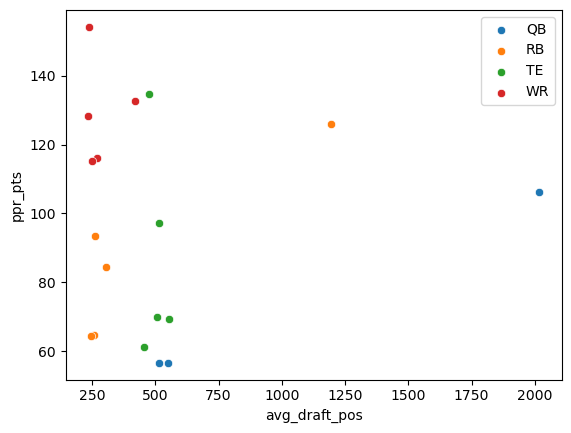

In [523]:
for p in pos:
    sns.scatterplot(x=sleeper(seasons, p, 2022).sort_values('ppr_pts', ascending=False).head()['avg_draft_pos'],
                    y=sleeper(seasons, p, 2022).sort_values('ppr_pts', ascending=False).head()['ppr_pts'])
    plt.legend(pos)

In [526]:
sleeper(seasons, 'WR', 2022).sort_values('ppr_pts',ascending=False)

,player,rk,team,pos,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,standard_pts,ppr_pts,vbd,pos_rank,year,avg_draft_pos,avg_draft_pos_ppr
3562,Mack Hollins,128,LVR,WR,29,17,16,1.0,1.0,4.0,0.0,0.0,4.0,40.0,10.00,0.0,94.0,57.0,690.0,12.11,4.0,0.0,0.0,4,97.0,154.2,0.0,42,2022,237.0,228.0
3099,Richie James,156,NYG,WR,27,17,4,0.0,0.0,0.0,0.0,0.0,2.0,6.0,3.00,0.0,70.0,57.0,569.0,9.98,4.0,3.0,3.0,4,76.0,132.5,0.0,55,2022,418.0,416.0
3505,Darius Slayton,148,NYG,WR,25,16,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,71.0,46.0,724.0,15.74,2.0,2.0,1.0,2,82.0,128.4,0.0,51,2022,236.0,223.0
3236,Kalif Raymond,173,DET,WR,28,17,7,0.0,0.0,0.0,0.0,0.0,7.0,36.0,5.14,0.0,64.0,47.0,616.0,13.11,0.0,3.0,1.0,1,69.0,116.2,0.0,63,2022,271.0,260.0
3307,Chris Moore,175,HOU,WR,29,16,7,0.0,0.0,0.0,0.0,0.0,3.0,3.0,1.00,0.0,74.0,48.0,548.0,11.42,2.0,0.0,0.0,2,67.0,115.1,0.0,66,2022,250.0,237.0
3343,Noah Brown,166,DAL,WR,26,16,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,74.0,43.0,555.0,12.91,3.0,1.0,1.0,3,72.0,114.5,0.0,59,2022,241.0,231.0
3175,Greg Dortch,192,ARI,WR,24,16,4,0.0,0.0,0.0,0.0,0.0,7.0,44.0,6.29,0.0,64.0,52.0,467.0,8.98,2.0,1.0,1.0,2,61.0,113.1,0.0,76,2022,376.0,389.0
3293,DeAndre Carter,176,LAC,WR,29,17,7,0.0,0.0,0.0,0.0,0.0,2.0,-15.0,-7.50,0.0,65.0,46.0,538.0,11.70,3.0,3.0,2.0,3,66.0,112.3,0.0,68,2022,360.0,366.0
3221,Josh Reynolds,180,DET,WR,27,14,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,59.0,38.0,479.0,12.61,3.0,0.0,0.0,3,66.0,103.9,0.0,69,2022,248.0,244.0
3538,Demarcus Robinson,206,BAL,WR,28,17,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,75.0,48.0,458.0,9.54,2.0,2.0,1.0,2,56.0,103.8,0.0,81,2022,261.0,253.0


In [531]:
seasons[seasons['player'].str.contains('Lindsay')]

,player,rk,team,pos,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,standard_pts,ppr_pts,vbd,pos_rank,year,avg_draft_pos,avg_draft_pos_ppr
1243,Phillip Lindsay,29,DEN,RB,24,15,8,0.0,0.0,0.0,0.0,0.0,192.0,1037.0,5.40,9.0,47.0,35.0,241.0,6.89,1.0,0.0,0.0,10,188.0,222.8,52.0,12,2018,981.0,964.0
1757,Phillip Lindsay,49,DEN,RB,25,16,16,0.0,0.0,0.0,0.0,0.0,224.0,1011.0,4.51,7.0,48.0,35.0,196.0,5.60,0.0,0.0,0.0,7,163.0,197.7,22.0,19,2019,47.1,55.6
2272,Phillip Lindsay,211,DEN,RB,26,11,8,0.0,0.0,0.0,0.0,0.0,118.0,502.0,4.25,1.0,14.0,7.0,28.0,4.00,0.0,0.0,0.0,1,59.0,66.0,0.0,61,2020,85.3,83.8
2804,Phillip Lindsay,261,2TM,RB,27,14,1,0.0,0.0,0.0,0.0,0.0,88.0,249.0,2.83,1.0,5.0,4.0,45.0,11.25,1.0,0.0,0.0,2,41.0,45.4,0.0,76,2021,110.2,103.4
3317,Phillip Lindsay,426,IND,RB,28,3,0,0.0,0.0,0.0,0.0,0.0,15.0,49.0,3.27,0.0,8.0,6.0,19.0,3.17,0.0,0.0,0.0,0,9.0,14.8,0.0,120,2022,229.0,240.0


In [565]:
seasons.sort_values('rush_rec_tds', ascending=False).head(15)

,player,rk,team,pos,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,standard_pts,ppr_pts,vbd,pos_rank,year,avg_draft_pos,avg_draft_pos_ppr
2034,Alvin Kamara,2,NOR,RB,25,15,10,0.0,0.0,0.0,0.0,0.0,187.0,932.0,4.98,16.0,107.0,83.0,756.0,9.11,5.0,1.0,0.0,21,295.0,377.8,165.0,2,2020,4.8,4.9
1286,Todd Gurley,1,LAR,RB,24,14,14,0.0,0.0,0.0,0.0,0.0,256.0,1251.0,4.89,17.0,81.0,59.0,580.0,9.83,4.0,1.0,1.0,21,313.0,372.1,178.0,1,2018,1.4,1.3
2911,Austin Ekeler,5,LAC,RB,26,16,16,0.0,0.0,0.0,0.0,0.0,206.0,911.0,4.42,12.0,94.0,70.0,647.0,9.24,8.0,4.0,3.0,20,274.0,343.8,120.0,2,2021,13.1,6.5
46,David Johnson,1,ARI,RB,25,16,16,0.0,0.0,0.0,0.0,0.0,293.0,1239.0,4.23,16.0,120.0,80.0,879.0,10.99,4.0,5.0,3.0,20,328.0,407.8,191.0,1,2016,5.4,3.4
3027,Jonathan Taylor,1,IND,RB,22,17,17,0.0,0.0,0.0,0.0,0.0,332.0,1811.0,5.45,18.0,51.0,40.0,360.0,9.00,2.0,4.0,2.0,20,333.0,373.1,176.0,1,2021,8.4,13.2
1709,Aaron Jones,4,GNB,RB,25,16,16,0.0,0.0,0.0,0.0,0.0,236.0,1084.0,4.59,16.0,68.0,49.0,474.0,9.67,3.0,3.0,2.0,19,266.0,314.8,125.0,3,2019,25.5,29.2
1678,Christian McCaffrey,1,CAR,RB,23,16,16,0.0,2.0,0.0,0.0,0.0,287.0,1387.0,4.83,15.0,142.0,116.0,1005.0,8.66,4.0,1.0,0.0,19,355.0,471.2,215.0,1,2019,3.6,3.2
779,Todd Gurley,1,LAR,RB,23,15,15,0.0,0.0,0.0,0.0,0.0,279.0,1305.0,4.68,13.0,87.0,64.0,788.0,12.31,6.0,5.0,2.0,19,319.0,383.3,192.0,1,2017,16.8,19.4
310,LeGarrette Blount,8,NWE,RB,30,16,8,0.0,0.0,0.0,0.0,0.0,299.0,1161.0,3.88,18.0,8.0,7.0,38.0,5.43,0.0,2.0,1.0,18,226.0,232.9,89.0,7,2016,82.0,91.6
3429,Austin Ekeler,6,LAC,RB,27,17,17,0.0,0.0,0.0,0.0,0.0,204.0,915.0,4.49,13.0,127.0,107.0,722.0,6.75,5.0,5.0,3.0,18,266.0,372.7,118.0,4,2022,7.2,2.7


In [566]:
df = pd.read_csv('season.csv',index_col=0)

seasons = range(2016,2023)
positions = ['QB','RB','WR','TE']
add = []

for s in seasons:
    for p in positions:
        test = df[(df.year==s)&(df.pos==p)].sort_values('avg_draft_pos_ppr').reset_index(drop=True)
        test['adp_by_pos'] = test.index+1
        
        test = test[(test.year==s)&(test.pos==p)].sort_values('ppr_pts',ascending=False).reset_index(drop=True)
        test['pos_rank'] = test.index+1
        
        add.append(test)

df = pd.concat(add).reset_index(drop=True)

for i in range(0,len(df.index)):
    if df.loc[i,'pos'] =='QB' or df.loc[i,'pos'] =='TE':
        
        if df.loc[i, 'adp_by_pos'] <= 3:
            if df.loc[i,'pos_rank'] <= 3:
                df.loc[i,'success'] = 1
            else:
                df.loc[i, 'success'] = 0
        else:
            if df.loc[i,'pos_rank']<=12:
                df.loc[i,'success'] = 1
            else:
                df.loc[i, 'success'] = 0

    else:
        if df.loc[i, 'adp_by_pos'] <= 6:
            if df.loc[i,'pos_rank'] <= 6:
                df.loc[i,'success'] = 1
            else:
                df.loc[i, 'success'] = 0

        elif df.loc[i, 'adp_by_pos'] > 36:
            if df.loc[i,'pos_rank'] < 36:
                df.loc[i,'success'] = 1
            else:
                df.loc[i, 'success'] = 0

        else:
            if df.loc[i,'pos_rank'] <= df.loc[i,'adp_by_pos']:
                df.loc[i, 'success'] = 1
            else:
                df.loc[i, 'success'] = 0
        
        
for i in range(0,len(df.index)):
    if df.loc[i,'avg_draft_pos_ppr'] <= 12:
        df.loc[i, 'round'] = 1
    elif df.loc[i,'avg_draft_pos_ppr'] <= 24:
        df.loc[i, 'round'] = 2
    elif df.loc[i,'avg_draft_pos_ppr'] <= 36:
        df.loc[i, 'round'] = 3
    elif df.loc[i,'avg_draft_pos_ppr'] <= 48:
        df.loc[i, 'round'] = 4
    elif df.loc[i,'avg_draft_pos_ppr'] <= 60:
        df.loc[i, 'round'] = 5
    elif df.loc[i,'avg_draft_pos_ppr'] <= 72:
        df.loc[i, 'round'] = 6
    elif df.loc[i,'avg_draft_pos_ppr'] <= 84:
        df.loc[i, 'round'] = 7
    elif df.loc[i,'avg_draft_pos_ppr'] <= 96:
        df.loc[i, 'round'] = 8
    elif df.loc[i,'avg_draft_pos_ppr'] <= 108:
        df.loc[i, 'round'] = 9
    elif df.loc[i,'avg_draft_pos_ppr'] <= 120:
        df.loc[i, 'round'] = 10
    elif df.loc[i,'avg_draft_pos_ppr'] <= 132:
        df.loc[i, 'round'] = 11
    elif df.loc[i,'avg_draft_pos_ppr'] <= 144:
        df.loc[i, 'round'] = 12
    elif df.loc[i,'avg_draft_pos_ppr'] <= 156:
        df.loc[i, 'round'] = 13
    elif df.loc[i,'avg_draft_pos_ppr'] <= 168:
        df.loc[i, 'round'] = 14
    else:
        df.loc[i, 'round'] = 15

In [569]:
df.drop(columns=['standard_pts','vbd'], inplace=True)

In [570]:
df['pos'].unique()

array(['QB', 'RB', 'WR', 'TE'], dtype=object)

In [572]:
qb_df = df[df['pos']=='QB']
rb_df = df[df['pos']=='RB']
wr_df = df[df['pos']=='WR']
te_df = df[df['pos']=='TE']

In [594]:
passing.head()

,player,att,day,g#,week,date,age,team,home/away,opp,w/l,cmp%,yds,td,int,sk,yds.1,y/a,ay/a,y/c,pos.,pts,avg_pts,pts_var
0,Patrick Mahomes,39,Sun,1,1,2022-09-11,26,KAN,away,ARI,W,76.9,360,5,0,0,0,9.2,11.79,12.0,QB,34.40,20.822500,13.577500
1,Justin Herbert,34,Sun,1,1,2022-09-11,24,LAC,home,LVR,W,76.5,279,3,0,0,0,8.2,9.97,10.7,QB,23.16,15.727500,7.432500
2,Geno Smith,28,Mon,1,1,2022-09-12,31,SEA,home,DEN,W,82.1,195,2,0,2,18,7.0,8.39,8.5,QB,15.80,16.362667,-0.562667
3,Kirk Cousins,32,Sun,1,1,2022-09-11,34,MIN,home,GNB,W,71.9,277,2,0,1,8,8.7,9.91,12.0,QB,19.08,16.712000,2.368000
4,Jordan Love,5,Sun,1,1,2022-09-11,23,GNB,away,MIN,L,80.0,65,0,0,0,0,13.0,13.00,16.3,QB,2.60,3.050000,-0.450000


In [ ]:
df_rolling = df[list(selected_columns) + ["player"]]

def find_player_averages(player):
    rolling = player.rolling(2).mean()
    return rolling

df_rolling = df_rolling.groupby("player", group_keys=False).apply(find_player_averages)

rolling_cols = [f"{col}_2" for col in df_rolling.columns]
df_rolling.columns = rolling_cols
df = pd.concat([df, df_rolling], axis=1)

df = df.dropna()

In [839]:
pass_new = passing[passing['date'].dt.year==2018]
passing_pts_avg = pass_new[['player'] + ['pts_var']]


def find_pts_averages(player):
    pts_var_avg = player.abs().mean()
    return pts_var_avg


passing_pts_avg = passing_pts_avg.groupby('player', group_keys=False).apply(find_pts_averages)
pass_new.drop(columns='pts_var_avg', inplace=True)
pass_new = pass_new.merge(right=passing_pts_avg, on='player', how='left')
pass_new.rename(columns={'pts_var_x':'pts_var','pts_var_y':'pts_var_avg'}, inplace=True)

In [840]:
passing_new = passing_new.append(pass_new)

In [832]:
passing_new = pass_new

In [761]:
passing_new = passing_new.append(passing_2020)

In [762]:
passing_new = passing_new.append(passing_2019)

In [763]:
passing_new = passing_new.append(passing_2018)
passing_new

,player,att,day,g#,week,date,age,team,home/away,opp,w/l,cmp%,yds,td,int,sk,yds.1,y/a,ay/a,y/c,pos.,pts,avg_pts,pts_var,pts_var_avg
0,Patrick Mahomes,39,Sun,1,1,2022-09-11,26,KAN,away,ARI,W,76.9,360,5,0,0,0,9.2,11.79,12.0,QB,34.40,20.8225,13.5775,4.738125
1,Patrick Mahomes,35,Thu,2,2,2022-09-15,26,KAN,home,LAC,W,68.6,235,2,0,1,9,6.7,7.86,9.8,QB,17.40,20.8225,-3.4225,4.738125
2,Patrick Mahomes,35,Sun,3,3,2022-09-25,27,KAN,away,IND,L,57.1,262,1,1,1,5,7.5,6.77,13.1,QB,12.48,20.8225,-8.3425,4.738125
3,Patrick Mahomes,37,Sun,4,4,2022-10-02,27,KAN,away,TAM,W,62.2,249,3,1,3,21,6.7,7.14,10.8,QB,19.96,20.8225,-0.8625,4.738125
4,Patrick Mahomes,43,Mon,5,5,2022-10-10,27,KAN,home,LVR,W,67.4,292,4,0,3,27,6.8,8.65,10.1,QB,27.68,20.8225,6.8575,4.738125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Jarvis Landry,1,Sun,13,14,2018-12-09,26,CLE,home,CAR,W,0.0,0,0,0,0,0,0.0,0.00,NaN,WR,0.00,1.2600,-1.2600,1.870000
457,Jarvis Landry,1,Sun,15,16,2018-12-23,26,CLE,home,CIN,W,100.0,63,0,0,0,0,63.0,63.00,63.0,WR,2.52,1.2600,1.2600,1.870000
458,Mike Glennon,14,Sun,14,15,2018-12-16,29,ARI,away,ATL,L,71.4,111,1,0,1,8,7.9,9.36,11.1,QB,8.44,5.4800,2.9600,4.605000
459,Mike Glennon,7,Sun,15,16,2018-12-23,29,ARI,home,LAR,L,71.4,63,0,0,0,0,9.0,9.00,12.6,QB,2.52,5.4800,-2.9600,4.605000


In [774]:
rushing_2018 = rush[rush['date'].dt.year==2018]
rushing_pts_avg = rushing_2018[['player'] + ['pts_var']]


def find_pts_averages(player):
    pts_var_avg = player.abs().mean()
    return pts_var_avg


rushing_pts_avg = rushing_pts_avg.groupby('player', group_keys=False).apply(find_pts_averages)
rushing_2018 = rushing_2018.merge(right=rushing_pts_avg, on='player')
rushing_2018.rename(columns={'pts_var_x':'pts_var','pts_var_y':'pts_var_avg'}, inplace=True)

In [767]:
rush_new = rushing_2022

In [769]:
rush_new = rush_new.append(rushing_2021)

In [771]:
rush_new = rush_new.append(rushing_2020)

In [773]:
rush_new = rush_new.append(rushing_2019)

In [775]:
rush_new = rush_new.append(rushing_2018)

In [868]:
rec_new = receive[receive['date'].dt.year==2018]
rec_pts_avg = rec_new[['player'] + ['pts_var']]


def find_pts_averages(player):
    pts_var_avg = player.abs().mean()
    return pts_var_avg


rec_pts_avg = rec_pts_avg.groupby('player', group_keys=False).apply(find_pts_averages)
rec_new = rec_new.merge(right=rec_pts_avg, on='player', how='left')
rec_new.rename(columns={'pts_var_x':'pts_var','pts_var_y':'pts_var_avg'}, inplace=True)

In [860]:
receive_new = rec_new

In [869]:
receive_new = receive_new.append(rec_new)

In [870]:
receive_new = receive_new.fillna(0)

In [846]:
passing_new = passing_new.fillna(0)

In [847]:
rush_new = rush_new.fillna(0)

In [872]:
receive_new.to_csv('receive.csv')

In [849]:
passing_new.to_csv('passing.csv')

In [850]:
rush_new.to_csv('rush.csv')

In [871]:
receive_new[receive_new['player']=='Tyreek Hill']

,player,yds,tgt,day,g#,week,date,age,team,home/away,opp,w/l,rec,y/r,td,ctch%,y/tgt,pos.,pts,avg_pts,pts_var,pts_var_avg
12,Tyreek Hill,94,12,Sun,1,1,2022-09-11,28,MIA,home,NWE,W,8,11.8,0,66.7,7.8,WR,17.4,20.512500,-3.112500,7.964062
266,Tyreek Hill,190,13,Sun,2,2,2022-09-18,28,MIA,away,BAL,W,11,17.3,2,84.6,14.6,WR,42.0,20.512500,21.487500,7.964062
610,Tyreek Hill,33,4,Sun,3,3,2022-09-25,28,MIA,home,BUF,W,2,16.5,0,50.0,8.3,WR,5.3,20.512500,-15.212500,7.964062
781,Tyreek Hill,160,14,Thu,4,4,2022-09-29,28,MIA,away,CIN,L,10,16.0,0,71.4,11.4,WR,26.0,20.512500,5.487500,7.964062
1097,Tyreek Hill,47,7,Sun,5,5,2022-10-09,28,MIA,away,NYJ,L,7,6.7,0,100.0,6.7,WR,11.7,20.512500,-8.812500,7.964062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392,Tyreek Hill,215,14,Mon,11,11,2018-11-19,24,KAN,away,LAR,L,10,21.5,2,71.4,15.4,WR,43.5,19.053333,24.446667,10.350222
2992,Tyreek Hill,13,6,Sun,12,13,2018-12-02,24,KAN,away,OAK,W,1,13.0,0,16.7,2.2,WR,2.3,19.053333,-16.753333,10.350222
3094,Tyreek Hill,139,14,Sun,13,14,2018-12-09,24,KAN,home,BAL,W,8,17.4,0,57.1,9.9,WR,21.9,19.053333,2.846667,10.350222
3395,Tyreek Hill,46,7,Thu,14,15,2018-12-13,24,KAN,home,LAC,L,4,11.5,0,57.1,6.6,WR,8.6,19.053333,-10.453333,10.350222


In [857]:
receive[(receive['player']=='Tyreek Hill') & (receive['date'].dt.year==2022)]['pts_var'].abs().mean()

7.9640625